<div style="background-image:url(images/meschede-seismic-waves.png); padding: 10px 30px 20px 30px; background-size:cover; background-opacity:50%; border-radius:5px">
<p style="float:right; margin-top:20px; padding: 20px 20px 0px 20px; background:rgba(255,255,255,0.6); border-radius:10px;">
<img width="400px" src=images/obspy_logo_full_524x179px.png?raw=true>
</p>

<h1 style="color:#999">ObsPy Workshop</h1>
<h5 style="color:#FFF">Münster, July 7th & 8th</h5>

<h3 style="color:#EEE">Data Acquisition and Processing with ObsPy</h3>

<h2 style="color:#FFF">Introduction/Index</h2>
</div>

# Exercise -- The 2008 Mt. Carmel, Illinois, Earthquake and Aftershock Series

Introduction from 
["The April 18, 2008 Illinois Earthquake: An ANSS Monitoring Success" by Robert B. Herrmann, Mitch Withers, and Harley Benz, SRL 2008](http://srl.geoscienceworld.org/content/79/6/830.extract):

*"The largest-magnitude earthquake in the past 20 years struck near **Mt. Carmel in southeastern Illinois** on Friday morning, 18 April 2008 at 09:36:59 UTC (04:37 CDT). **The Mw 5.2 earthquake was felt over an area that spanned Chicago and Atlanta**, with about 40,000 reports submitted to the U.S. Geological Survey (USGS) “Did You Feel It?” system. There were at least six felt aftershocks greater than magnitude 3 and 20 aftershocks with magnitudes greater than 2 located by regional and national seismic networks. **Portable instrumentation was deployed** by researchers of the University of Memphis and Indiana University (the first portable station was installed at about 23:00 UTC on 18 April). The portable seismographs were deployed both to capture near-source, high-frequency ground motions for significant aftershocks and to better understand structure along the active fault. [...]"*

<img src="http://earthquake.usgs.gov/images/globes/40_-90.jpg" alt="World map" style="width: 250px;"/>
<img src="http://earthquake.usgs.gov/earthquakes/dyfi/events/us/2008qza6/us/us2008qza6_ciim_zoomout.jpg" alt="Felt report map" style="width: 700px;"/>

Web page hits at USGS/NEIC during 24 hours after the earthquake:

 - peak rate: **3,892 hits/second**
 - **68 million hits** in the 24 hours after the earthquake

<img src="http://www.geophysik.uni-muenchen.de/~megies/.iris/.mtcarmel_figure1.jpg" alt="USGS/NEIC web page hits" style="width: 500px;"/>

Some links:

 - http://earthquake.usgs.gov/earthquakes/dyfi/events/us/2008qza6/us/index.html
 - http://earthquake.usgs.gov/earthquakes/eqinthenews/2008/us2008qza6/#summary
 - http://srl.geoscienceworld.org/content/79/6/830.extract
 - http://srl.geoscienceworld.org/content/82/5/735.short

In [1]:
%matplotlib inline

### Use the search on the [ObsPy docs](http://docs.obspy.org/) for any functionality that you do not remember/know yet..!
### E.g. [searching for "filter"](http://docs.obspy.org/search.html?q=filter)...

## 1. Download and visualize main shock

Request information on stations recording close to the event from IRIS using the [`obspy.fdsn Client`](http://docs.obspy.org/packages/obspy.fdsn.html), print the requested station information.

In [2]:
from obspy import UTCDateTime
from obspy.fdsn import Client

t = UTCDateTime(2008, 4, 18, 9, 36, 59)
lon = -87.89
lat = 38.45

client = Client("IRIS")
inventory = client.get_stations(
    starttime=t-100, endtime=t+100,
    longitude=lon, latitude=lat, maxradius=1,
    matchtimeseries=None)
print inventory

Inventory created at 2015-07-05T13:29:10.000000Z
	Created by: IRIS WEB SERVICE: fdsnws-station | version: 1.1.16
		    http://service.iris.edu/fdsnws/station/1/query?latitude=38.45&endti...
	Sending institution: IRIS-DMC (IRIS-DMC)
	Contains:
		Networks (5):
			KY
			NM
			PN
			SY
			Z3
		Stations (39):
			KY.MOKY (Morganfield, Kentucky)
			NM.NHIN (New Harmony,IN)
			NM.OLIL (Olney Central College  Olney, IL)
			NM.USIN (Univ. of Southern Indiana, Evansville, IN)
			PN.PPHHS (PPHHS)
			PN.PPPCH (Princeton Community High School, Princeton, IN, USA)
			SY.FFIL (FFIL synthetic)
			SY.OLIL (OLIL synthetic)
			SY.PPHHS (PPHHS synthetic)
			SY.PPPCH (PPPCH synthetic)
			SY.Q44A (Q44A synthetic)
			SY.Q44B (Q44B synthetic)
			SY.Q45A (Q45A synthetic)
			SY.Q46A (Q46A synthetic)
			SY.R44A (R44A synthetic)
			SY.R45A (R45A synthetic)
			SY.R46A (R46A synthetic)
			SY.S45A (S45A synthetic)
			SY.S46A (S46A synthetic)
			SY.USIN (USIN synthetic)
			SY.WB22 (WB22 synthetic)
			SY.WB26 (WB26 syn

Download waveform data for the mainshock for one of the stations using the FDSN client (if you get an error, maybe try a different station and/or ask for help). Make the preview plot using obspy.

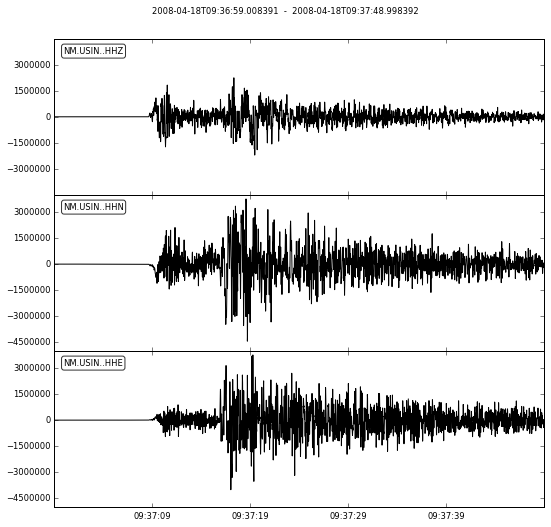

In [3]:
st = client.get_waveforms("NM", "USIN", "*", "HH*", t, t+50)
st.plot()

Visualize a Spectrogram (if you got time, you can play around with the different parameters for the spectrogram). Working on a copy of the donwloaded data, apply a filter, then trim the requested data to some interesting parts of the earthquake and plot the data again.

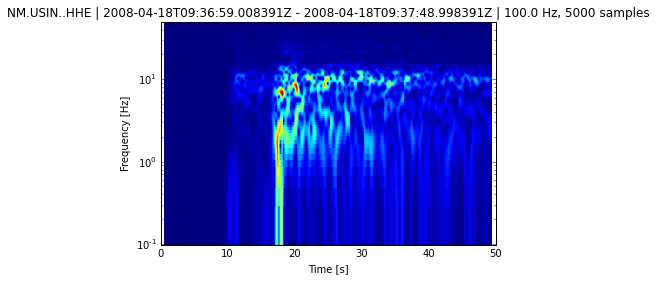

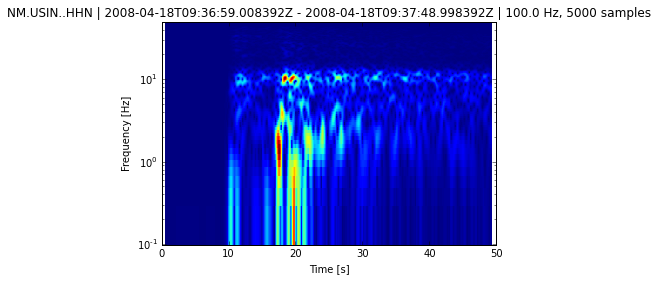

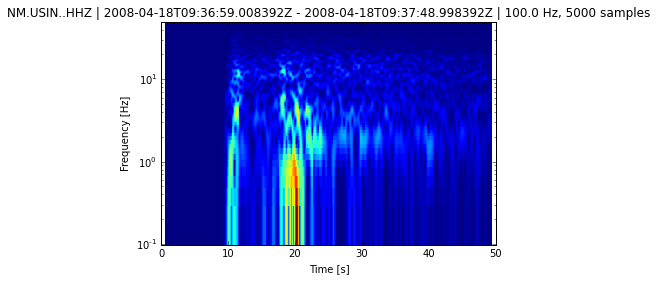

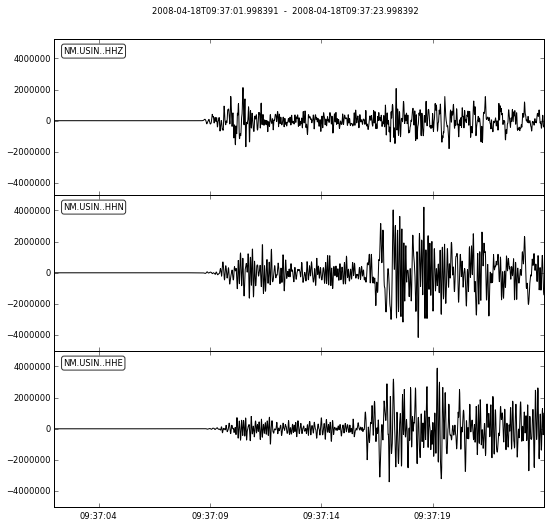

In [4]:
st.spectrogram(wlen=1.5, per_lap=0.9, mult=5, log=True)

st2 = st.copy()
st2.filter(type="bandpass", freqmin=1, freqmax=20)
st2.trim(t+3, t+25)
st2.plot()

Define a function `plot_data(t)` that fetches waveform data for this station and that shows a preview plot of 20 seconds of data starting at a given time. It should take a UTCDateTime object as the single argument.

In [5]:
def plot_data(time):
    st = client.get_waveforms("NM", "USIN", "*", "HH*", time, time+20)
    st.plot()

Test your function by calling it for the time of the main shock

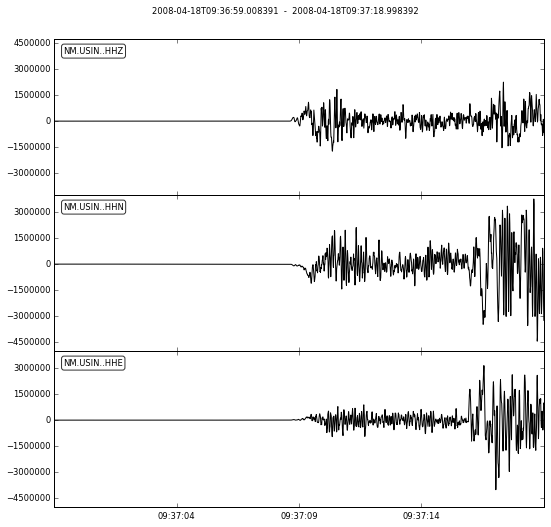

In [6]:
plot_data(t)

## 2. Visualize aftershock and estimate magnitude

Read file "`./data/mtcarmel.mseed`". It contains data of stations from an aftershock network that was set up shortly after the main shock. Print the stream information and have a look at the network/station information, channel names time span of the data etc.. Make a preview plot. 

3 Trace(s) in Stream:
Z3.IU3..BHZ | 2008-04-21T00:00:00.000000Z - 2008-04-22T00:00:00.000000Z | 40.0 Hz, 3456001 samples
Z3.IU4..BHZ | 2008-04-21T00:00:00.000000Z - 2008-04-22T00:00:00.000000Z | 40.0 Hz, 3456001 samples
Z3.IU5..BHZ | 2008-04-21T00:00:00.000000Z - 2008-04-22T00:00:00.000000Z | 40.0 Hz, 3456001 samples


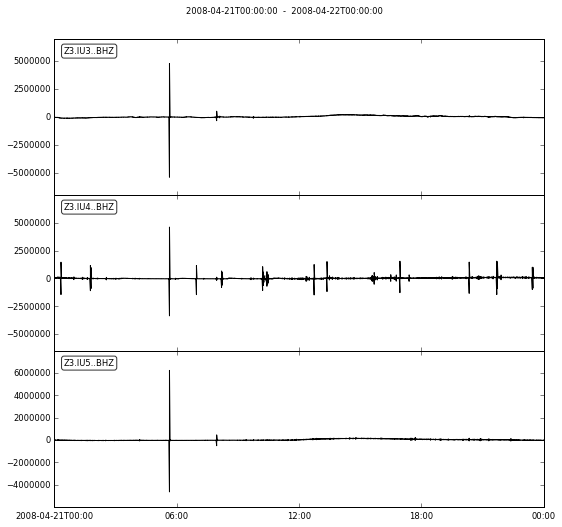

In [7]:
from obspy import read, UTCDateTime
st = read("./data/mtcarmel.mseed")
print st
st.plot()

The strongest aftershock you see in the given recordings is at `2008-04-21T05:38:30`. Trim the data to this aftershock and make a preview plot and a spectrogram plot of it.

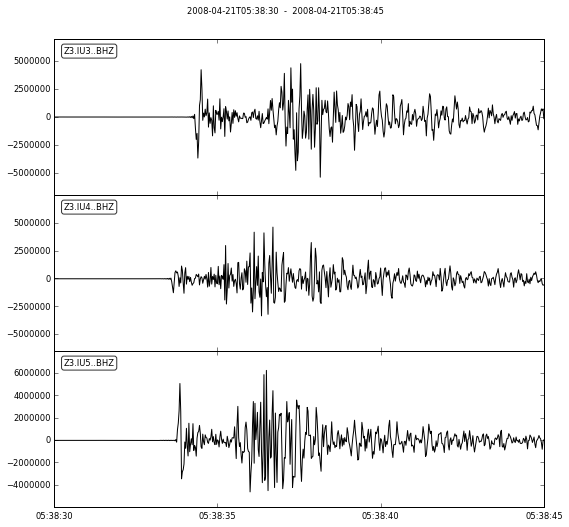

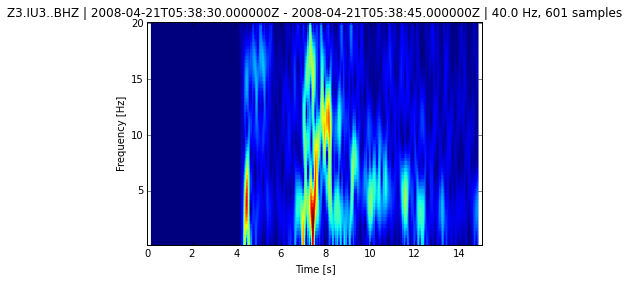

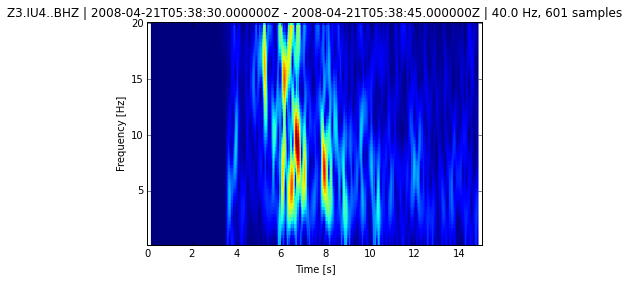

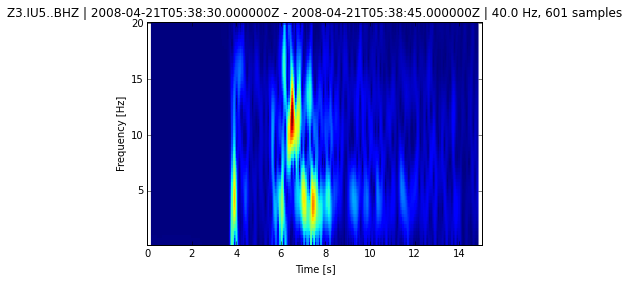

[None, None, None]

In [8]:
t = UTCDateTime("2008-04-21T05:38:30")
st.trim(t, t+15)
st.plot()
st.spectrogram()

Make a very simple approximation of the magnitude. Use the function provided below (after you execute the code box with the function you can call it anywhere in your code boxes).

Demean the data and then determine the raw data's peak value of the event at one of the stations (e.g. using Python's `max` function or a numpy method on the data array) and call the provided function for that value. (Note that this is usually done on the horizontal components.. we do it on vertical for simplicity here)

In [9]:
from obspy.signal import estimateMagnitude

def mag_approx(peak_value, frequency, hypo_dist=20):
    """
    Give peak value of raw data for a very crude and simple magnitude estimation.

    For simplicity, this is done assuming hypocentral location, peak frequency, etc.
    To keep it simple for now the response information is entered manually here
    (it is the same for all instruments used here).
    """
    poles = [-1.48600E-01  + 1.48600E-01j,
             -1.48600E-01  - 1.48600E-01j,
             -4.14690E+02  + 0.00000E+00j,
             -9.99027E+02  + 9.99027E+02j,
             -9.99027E+02  - 9.99027E+02j]
    zeros = [0.0 + 0.0j,
             0.0 + 0.0j,
             1.1875E+03 + 0.0j]
    norm_factor = 7.49898E+08
    sensitivity = 6.97095E+05
    paz = {'poles': poles, 'zeros': zeros, 'gain': norm_factor,
           'sensitivity': sensitivity}
    ml = estimateMagnitude(paz, peak_value, 0.5 / frequency, hypo_dist)
    return ml

In [10]:
peak = st[0].data.max()
print mag_approx(peak, 5)

4.37653796652


Do the magnitude approximation in a for-loop for all stations in the Stream. Calculate a network magnitude as the average of all three stations.

In [11]:
import numpy as np

magnitudes = []
for tr in st:
    station_mag = mag_approx(tr.data.max(), 5)
    magnitudes.append(station_mag)
mag = np.mean(magnitudes)
print mag

4.4101175372


Define a function `netmag(st)` that returns a network magnitude approximation. It should take a Stream object (which is assumed to be trimmed to an event) as only argument. Use the provided `mag_approx` function and calculate the mean of all traces in the stream internally.

In [12]:
def netmag(st):
    magnitudes = []
    for tr in st:
        station_mag = mag_approx(tr.data.max(), 5)
        magnitudes.append(station_mag)
    mag = np.mean(magnitudes)
    return mag

Test your function on the cut out Stream object of the large aftershock from before.

In [13]:
print netmag(st)

4.4101175372


#### Advanced
You can also download the station metadata using the FDSN client and extract poles and zeros information and directly use the `estimateMagnitude` function without using the hard-coded response information. 

###3. Detect aftershocks using triggering routines

Read the 3-station data from file `"./data/mtcarmel.mseed"` again. Apply a bandpass filter, adjust it to the dominant event frequency range you have seen in the aftershock spectrogram before. Run a recursive STA/LTA trigger on the filtered data (see [ObsPy docs](http://docs.obspy.org/packages/autogen/obspy.core.stream.Stream.trigger.html)). The length of the `sta` window should be a bit longer than an arriving seismic phase, the `lta` window can be around ten to twenty times as long.

Make a preview plot of the Stream object, now showing the characteristic function of the triggering. High trigger values indicate transient signals (of the frequency range of interest) that might be an event (or just a local noise burst on that station..).

(play around with different values and check out the resulting characteristic function)

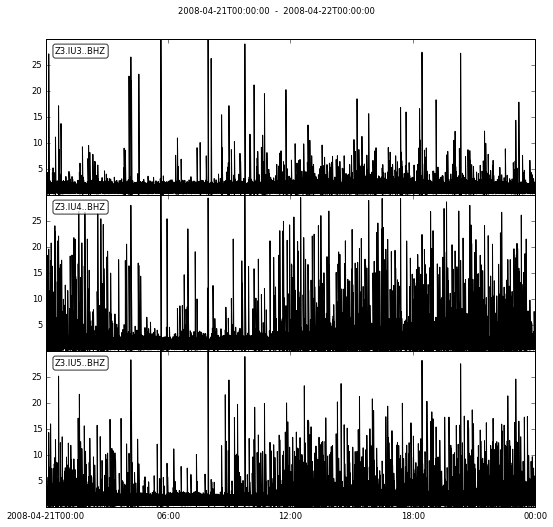

In [14]:
st = read("./data/mtcarmel.mseed")
st.filter("bandpass", freqmin=2, freqmax=10)
st.trigger(type="classicstalta", sta=1, lta=30)
st.plot()

We could now manually compare trigger values on the different stations to find small aftershocks, termed a network coincidence trigger. However, there is a convenience function in ObsPy's signal toolbox to do just that in only a few lines of code.

Read the data again and apply a bandpass to the dominant frequencies of the events. Use the `coincidenceTrigger` function that returns a list of possible events (see the [ObsPy Tutorial](http://docs.obspy.org/tutorial/code_snippets/trigger_tutorial.html#network-coincidence-trigger-example) for an example of a recursive STA/LTA network coincidence trigger). Print the length of the list and adjust the trigger-on/off thresholds so that you get around 5 suspected events.

Print the first trigger in the list to show information on the suspected event.

In [15]:
st = read("./data/mtcarmel.mseed")
from obspy.signal import coincidenceTrigger
st.filter("bandpass", freqmin=2, freqmax=10)
triggers = coincidenceTrigger("recstalta", 10, 2, st, 3, sta=1, lta=20)
print len(triggers)
print triggers[0]

5
{u'coincidence_sum': 3.0, u'similarity': {}, u'stations': [u'IU5', u'IU4', u'IU3'], u'trace_ids': [u'Z3.IU5..BHZ', u'Z3.IU4..BHZ', u'Z3.IU3..BHZ'], u'time': UTCDateTime(2008, 4, 21, 4, 11, 23, 550000), u'duration': 6.650000095367432}


Go over the list of triggers in a for-loop. For each trigger/suspected event:

 - print the time of the trigger
 - read the waveform data, use [`starttime` and `endtime` arguments for `read()`](http://docs.obspy.org/packages/autogen/obspy.core.stream.read.html) to trim the data to the suspected event right during reading (avoiding to read the whole file again and again)
 - calculate and print the network magnitude using the `netmag(st)` function from earlier
 - make a preview plot

If you're curious you can compare the crude magnitude estimates with the [table of aftershocks](http://www.seismosoc.org/publications/srl/SRL_82/srl_82-5_hamburger_et_al-esupp/Table_S2.txt) provided by the scientists that analyzed the aftershock sequence. The paper with details can be found here: ["Aftershocks of the 2008 Mt. Carmel, Illinois, Earthquake: Evidence for Conjugate Faulting near the Termination of the Wabash Valley Fault System" by M. W. Hamburger, K. Shoemaker, S. Horton, H. DeShon, M. Withers, G. L. Pavlis and E. Sherrill, SRL 2011](http://srl.geoscienceworld.org/content/82/5/735.short).

2.31645237368


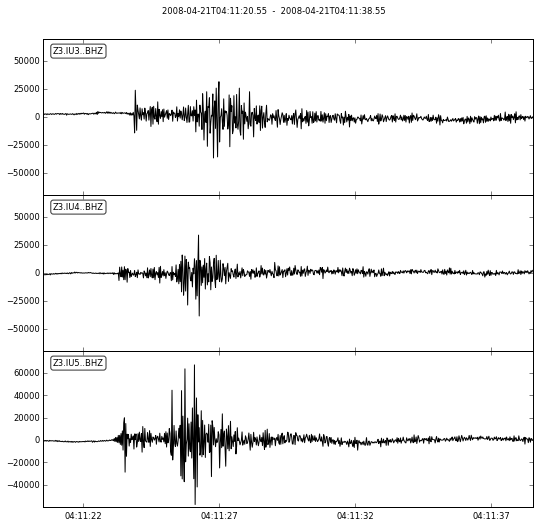

4.41308666701


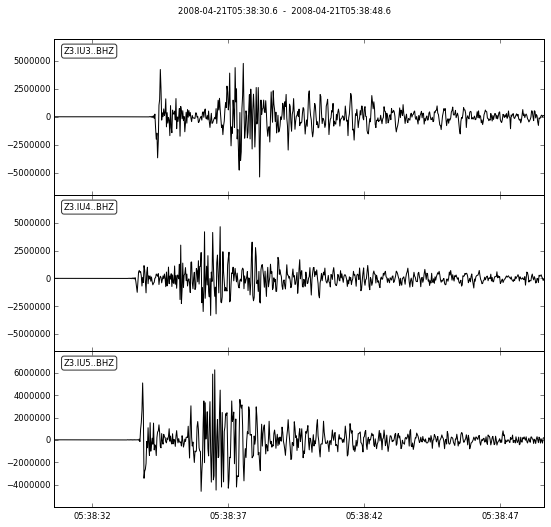

3.21270503471


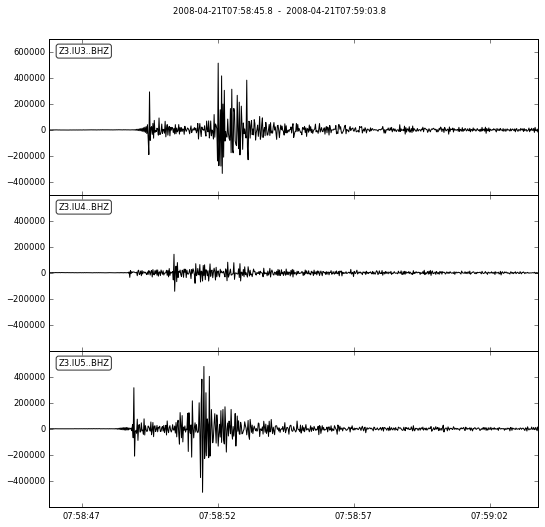

2.50153100102


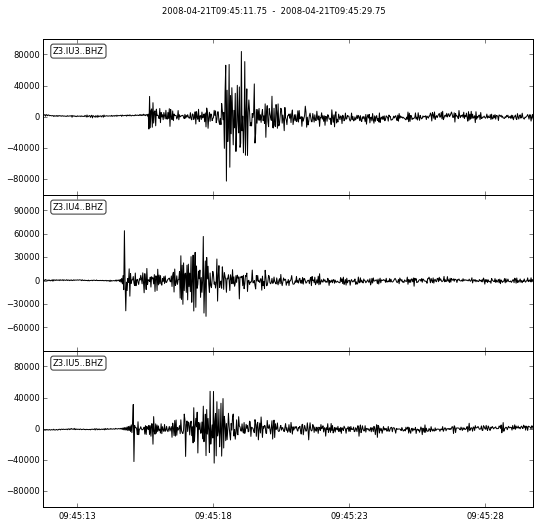

2.32796904636


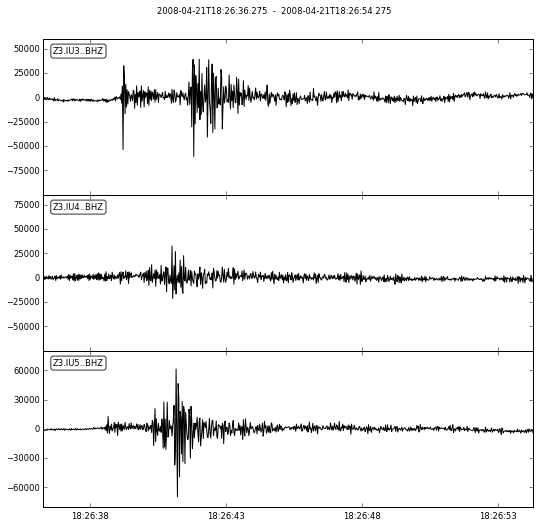

In [16]:
for trig in triggers:
    t = trig['time']
    st = read("./data/mtcarmel.mseed", starttime=t-3, endtime=t+15)
    st.detrend("demean")
    print netmag(st)
    st.plot()

#### Advanced:
You can also use event templates of some good signal-noise-ratio aftershocks to detect more weaker aftershocks and select from weak triggers based on waveform similarities like shown in the ObsPy tutorial. 

## 4. Cross correlation pick alignment

An unfortunate undergrad student picked his/her way through the aftershock sequence. For a high-precision relative location run (e.g. double difference, master-event relocation) you want to have more precise, cross correlation aligned phase picks.

The approach by [Deichmann and Garcia-Fernandez (1992, GJI)](http://onlinelibrary.wiley.com/doi/10.1111/j.1365-246X.1992.tb02088.x/abstract;jsessionid=F73CF9485C0432A3E14EDDDD0C73E058.d03t02) is implemented in the function [**`xcorrPickCorrection`**](http://docs.obspy.org/packages/autogen/obspy.signal.cross_correlation.xcorrPickCorrection.html) in `obspy.signal.cross_correlation`. Follow the [example in the ObsPy Tutorial](http://docs.obspy.org/tutorial/code_snippets/xcorr_pick_correction.html). Get time corrections for the event picks given in `pick_times` relative to the event pick `reference_pick`.

Use the data in file `"./data/mtcarmel_100hz.mseed"`. Before applying the correction resample to 200 Hz (the parabola fitting works better with the finer time resolution) and optionally bandpass to a relatively narrow frequency range.

In [17]:
reference_pick = "2008-04-19T12:46:45.96"
pick_times = ["2008-04-19T13:08:59.19",
              "2008-04-19T16:55:19.65",
              "2008-04-19T19:03:38.72",
              "2008-04-19T19:28:53.54"]

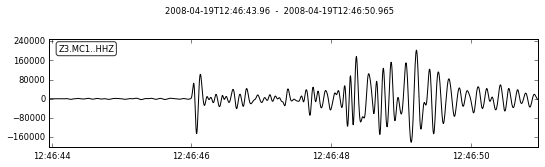

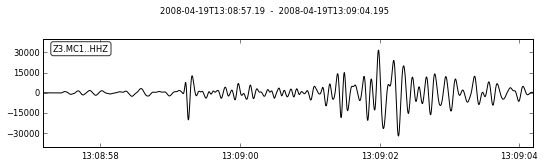

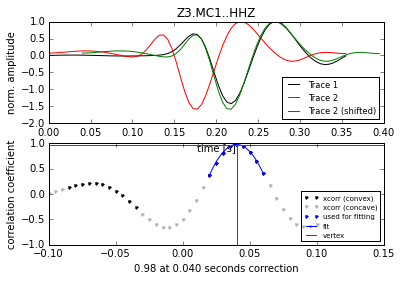

Bandpass prefiltering:
  Time correction for pick 2: -0.040376
  Correlation coefficient: 0.98


In [18]:
from obspy import read, UTCDateTime
from obspy.signal.cross_correlation import xcorrPickCorrection

t1 = UTCDateTime(reference_pick)
t2 = UTCDateTime(pick_times[0])

st1 = read("./data/mtcarmel_100hz.mseed", starttime=t1-2, endtime=t1+5)
st2 = read("./data/mtcarmel_100hz.mseed", starttime=t2-2, endtime=t2+5)

for tmp in [st1, st2]:
    tmp.detrend()
    tmp.taper(type="cosine", max_percentage=0.05)
    tmp.filter("bandpass", freqmin=2, freqmax=10)
    tmp.resample(200)

tr1 = st1[0]
tr2 = st2[0]

tr1.plot()
tr2.plot()

#dt, coeff = xcorrPickCorrection(t1, tr1, t2, tr2, 0.05, 0.25, 0.2, plot=True)

#print "No preprocessing:"
#print "  Time correction for pick 2: %.6f" % dt
#print "  Correlation coefficient: %.2f" % coeff

dt, coeff = xcorrPickCorrection(t1, tr1, t2, tr2, 0.05, 0.2, 0.1, plot=True)

print "Bandpass prefiltering:"
print "  Time correction for pick 2: %.6f" % dt
print "  Correlation coefficient: %.2f" % coeff

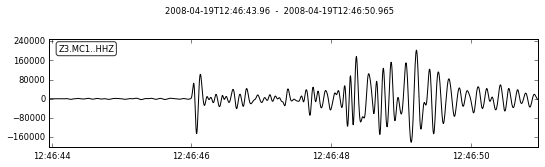

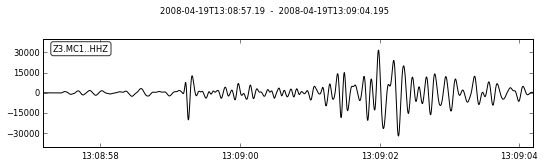

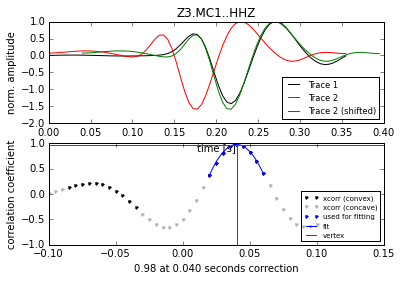

  Time correction for pick 2: -0.040376
  Correlation coefficient: 0.98


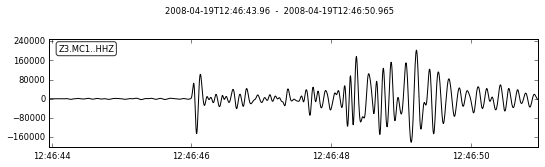

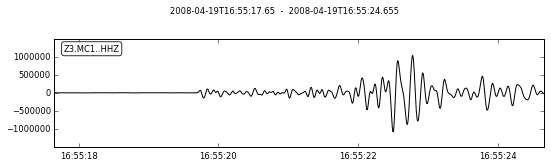

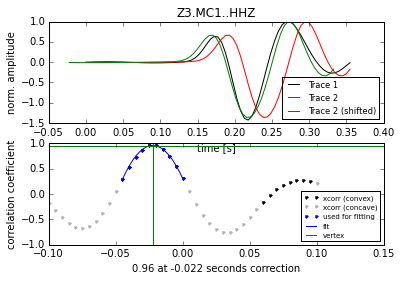

  Time correction for pick 2: 0.022321
  Correlation coefficient: 0.96


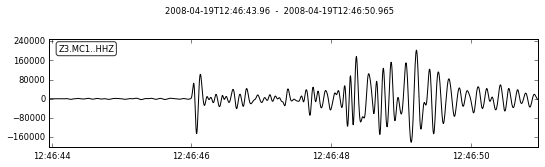

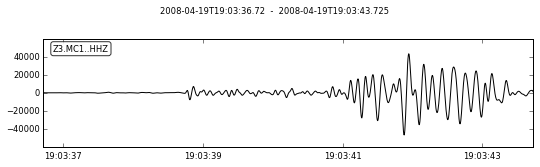

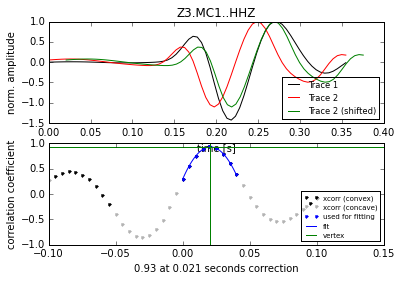

  Time correction for pick 2: -0.020793
  Correlation coefficient: 0.93


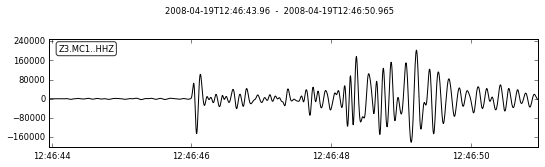

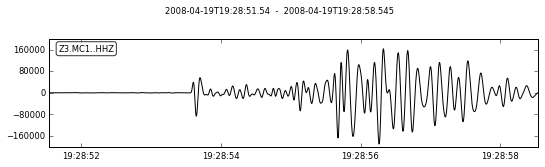

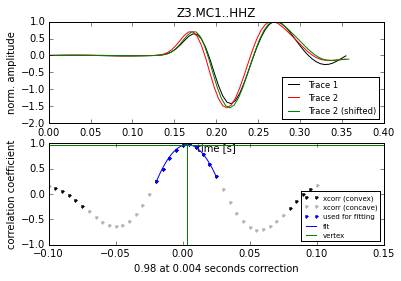

  Time correction for pick 2: -0.003533
  Correlation coefficient: 0.98


In [19]:
from obspy import read, UTCDateTime
from obspy.signal.cross_correlation import xcorrPickCorrection

t1 = UTCDateTime(reference_pick)

for t2 in pick_times:
    t2 = UTCDateTime(t2)

    st1 = read("./data/mtcarmel_100hz.mseed", starttime=t1-2, endtime=t1+5)
    st2 = read("./data/mtcarmel_100hz.mseed", starttime=t2-2, endtime=t2+5)

    for tmp in [st1, st2]:
        tmp.detrend()
        tmp.taper(type="cosine", max_percentage=0.05)
        tmp.filter("bandpass", freqmin=2, freqmax=10)
        tmp.resample(200)

    tr1 = st1[0]
    tr2 = st2[0]

    tr1.plot()
    tr2.plot()

    dt, coeff = xcorrPickCorrection(t1, tr1, t2, tr2, 0.05, 0.2, 0.1, plot=True)

    print "  Time correction for pick 2: %.6f" % dt
    print "  Correlation coefficient: %.2f" % coeff